# Exercise 8

#### Vorgaben

Ihr dürft für die Lösung der Übung zusammenarbeiten, so lange sich eure **Zusammenarbeit auf konzeptionelle und algorithmische Fragestellungen beschränkt**. Bei kopiertem Code oder Text (von Mitstudierenden oder dem Internet) werden alle Lösungen der beteiligten Parteien mit 0 Punkten bewertet. Dazu werden alle Lösungen manuell und automatisiert auf Kopien untersucht.

#### Abgabe

Arbeite auf einem eigenen Fork des Repositories `https://gitlab.fhnw.ch/ml/courses/dsp/dsp_hs2021`, zu welchem du @michael.graber und @florian.schaerer als *Maintainer* hinzufügst. Committe regelmässig. Als Abgabe gilt dein **letzter Commit bis Sonntag, 28. November 2021, 23:59:59 Uhr**.

#### Hinweise
- Der *Code* muss im Container zum Repo von Anfang bis Ende durchlaufen. Es wird nur funktionsfähiger Code bewertet.  
- Beschrifte sämtliche Achsen (Bezeichnung und Einheit wenn möglich).
- Ergänze den Plot mit zusätzlicher Beschriftung falls dies notwendig ist zum Verständnis des Plots.
- Diskutiere jeden Plot und beginne dabei mit einer Beschreibung dessen was der Plot zeigt.
- Versuche eine kompakte und performante Implementierung zu finden. Vollständige Punktzahl erreichst du bloss mit performantem *Code*.

### Aufgabe 1 (8 Punkte)

Lade das Bild `Turing.jpg` aus dem Verzeichnis dieses Übungsblatts in ein Numpy Array.

- Wie viel Speicherplatz braucht das Array?
- Was ist seine Form?
- Was ist seine Dimensionalität?  
- Wie viel Speicherplatz braucht ein einzelnes Elmement?
- Wie viele Elemente hat das Array?

Vergleiche Anzahl Elemente und benötigter Speicherplatz.
Machen diese Informationen Sinn zusammen? Begründe.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('seaborn-muted')

# YOUR CODE HERE
# read image
img = plt.imread("Turing.jpg")
# convert to numpy array
data = np.asarray(img)
# print answers
print("Grösse in Bytes (Speicherplatz): "+str(data.nbytes)) 
print("Form: "+str(data.shape)) 
print("Dimensionalität: "+str(data.ndim))
print("Grösse eines einzelnen Elements in Bytes: "+str(data.itemsize))
print("Anzahl Elemente: "+str(data.size))

Grösse in Bytes (Speicherplatz): 188000
Form: (470, 400)
Dimensionalität: 2
Grösse eines einzelnen Elements in Bytes: 1
Anzahl Elemente: 188000


Da das Array 188'000 Elemente mit je 1 Byte Grösse besitzt, macht es Sinn dass das Array 188'000 Bytes an Speicher benötigt.

### Aufgabe 2 (4 Punkte)

Zeichne das Bild. Verwende Graustufen zur Kodierung der Pixelwerte.

Kennst du Alan Turing? Wer war er? Nenne eine Errungenschaft oder eine Arbeit für die er bekannt ist (1-2 Sätze genügen).

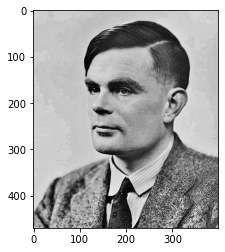

In [2]:
# show image in grayscale
plt.imshow(img, cmap="gray")


Ja ich habe bereits von ihm im Modul "Einführung Theoretische Informatik" gehört. Er war ein brillanter Logiker, Mathematiker und Informatiker der zum Beispiel eine universelle Turing-Maschine entwarf, welche mithilfe zahlreicher unterschiedlicher Programme eine grosse Anzahl an Probleme lösen konnte (was zur damaligen Zeit revolutionär war, da sonst für jedes Problem eine eigene Maschine entworfen werden musste)

### Aufgabe 3 (2 Punkte)

Flippe das Bild an der Diagonalen von oben links bis unten rechts und zeichne es erneut.

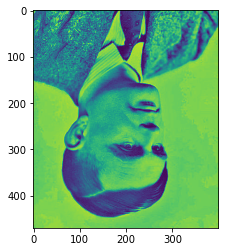

In [3]:
# flip image diagonally - it basically combines 'flipud' and 'fliplr', which flips numpy-arrays vertically and horizontally
img_flipped = np.flip(img)
# show flipped image
plt.imshow(img_flipped)


### Aufgabe 4 (6 Punkte)

Zeichne ein Histogramm der Pixelwerte.  

Zwischen welchen Werten streuen die Pixelwerte?  
Was ist eine sinnvoll gewählte Anzahl *Bins*? Begründe. 

Zeichne Median und Mittelwert mit ins Histogramm als vertikale Linien und beschrifte diese.

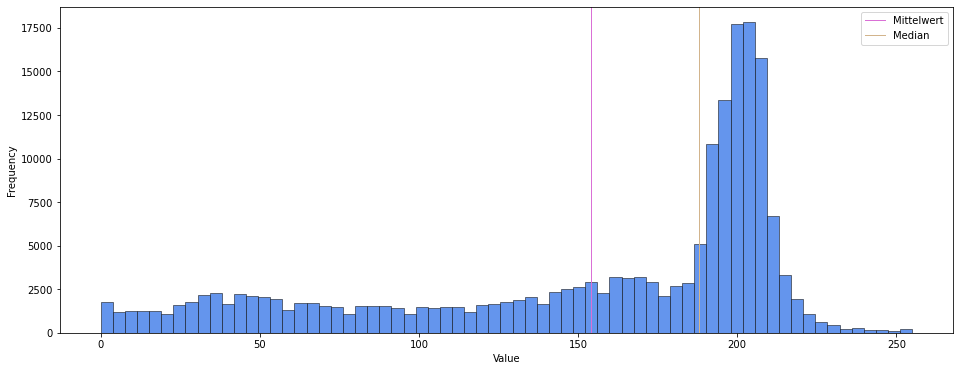

In [4]:
# flatten numpy array
flatten_data = data.flatten()

# histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,6))
_ = ax.hist(flatten_data, bins="scott", color="cornflowerblue", edgecolor="black", linewidth=0.5)

# calc mean and median
mean = np.mean(flatten_data)
median = np.median(flatten_data)

# show mean and median line
_ = ax.axvline(mean, color="orchid", linewidth=1, label="Mittelwert")
_ = ax.axvline(median, color="tan", linewidth=1, label="Median")

# show histogram legend
_ = ax.legend()

# histogram labels
_ = ax.set_ylabel("Frequency")
_ = ax.set_xlabel("Value")

Die Pixelwerte sind zwischen 0 und 255 verstreut. Um die Anzahl Bins zu bestimmen, habe ich den 'Freedman Diaconis Estimator' angewendet. Ich habe auch anderere Estimators ausprobiert, fand diesen jedoch ziemlich passend, da er einerseits die Faustregel erfüllt (mind. 20 Elemente im grössten Bin) und auch sehr anschaulich ist. Der FD Estimator hat hier 65 als optimal Anzahl Bins gewählt. 
Ohne Estimators hätte ich erst 255 Bins gewählt - damit hätte man genaue Angaben für jeden Pixelwert, jedoch wäre das Histogramm mit so vielen Bins nicht mehr sehr anschaulich gewesen... heisst ich hätte diesen Wert nochmal halbiert (also 127, oder nochmals 64), damit jeder Bin 2 (oder 3) Werte hat und das Histogramm noch anschaulicher wird. (Je weniger breit der Range eines Bins ist, desto aussagekräftiger ist das Histogramm letztendlich)

### Aufgabe 5 (6 Punkte)

Nun 'Binarisieren' wir unser Originalbild: Berechne zwei neue Bilder, welche jeweils sämtliche Werte kleiner-gleich dem Mittelwert, bzw. dem Median, gleich 0 gesetzt haben, alle Werte darüber gleich 1.  

Zeichne beide Bilder.  

Unterscheiden sich die Bilder stark? Wieso?

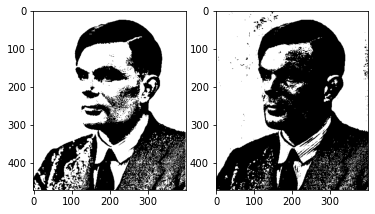

In [5]:
#copies of np-array
data_mean_bin = np.copy(data)
data_median_bin = np.copy(data)

#mean binarized
data_mean_bin[data_mean_bin <= mean]=0
data_mean_bin[data_mean_bin > mean]=1

#median binarized
data_median_bin[data_median_bin <= median]=0
data_median_bin[data_median_bin > median]=1

#display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(data_mean_bin, cmap="gray");
ax[1].imshow(data_median_bin, cmap="gray");

Nein nur schwach. Da auch der Mittelwert und Median sich nicht stark unterscheiden. Wären zwischen Mittelwert und Median mehr Pixelwerte gewesen, würden sich die Bilder auch stärker unterscheiden.

### Aufgabe 6 (8 Punkte)

Berechne und zeichne für das Originalbild das normalisierte Histogramm $p(v)$, die normalisierte kumulative Verteilung der Pixelwerte $P(v)$ und den kumulativen Mittelwert $m(v)$ der Pixelwerte. Verwende *Bins* der Grösse 1 zwischen 0 und (inklusive) maximalem Bildwert. Die Funktionswerte für das normalisierte Histogramm entsprechen dabei dem Anteil Werte in einem *Bin*. Die normalisierte kumulative Verteilung entspricht dem Anteil der Pixelwerte welche den Wert $v$ oder kleiner annehmen:

\begin{equation}
P(v) = \sum_{i=0}^v p(i)
\end{equation}

Der kumulative Mittelwert ist definiert als  

\begin{equation}
m(v) = \sum_{i=0}^{v} i\cdot p(i)
\end{equation}  

Zeichne die Funktionen untereinander als Subplots in eine Figure, als Stufenfunktionen mit der `matplotlib`-Funktion `step` und berechne die kumulative Summen mit `np.cumsum`.  

Was ist der grösste Wert der kumulativen Mittelwert-Funktion? Was entspricht er? Erkläre.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


YOUR ANSWER HERE

### Aufgabe 7  (6 Punkte)

*Otsu's Method* (Otsu, 1979) ist ein Algorithmus zur Berechnung eines Schwellwerts für die Binarisierung von Bildern. Ziel von *Otsu's Method* ist es, die Varianz zwischen den Werten der beiden Pixelgruppen zu maximieren.  

Zur Umsetzung des Algorithmus haben wir in Aufgabe 6 schon einiges vorbereitet. Wir brauchen nämlich $p(v), P(v)$ und $m(v)$. Mit ihrer Hilfe können wir die Varianz zwischen den Pixelwerten aus den beiden Wertebereichen für einen beliebigen Schwellwert $t$ berechnen.

$$
\begin{equation}
\sigma^{2}(t) = \frac{(max(m(\cdot))P(t) - m(t))^2}{P(t)(1-P(t))}
\end{equation} 
$$

Berechnen Sie $\sigma^2(t)$ für alle möglichen $t$ und zeichnen Sie die Funktion.  

*Otsu's* Schwellwert ist bei jenem $t$ zu wählen, für welches $\sigma^2(t)$ maximal ist (sollte das Maximum nicht eindeutig sein, so wird über die verschiedenen Kandidaten gemittelt).  


Schreiben Sie nun eine Funktion `otsu_threshold(image)`, welche den Otsu Schwellwert für ein beliebiges Graustufenbild berechnet.

Was ist *Otsu's* Schwellwert für unser Originalbild? 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Aufgabe 8 (5 Punkte)

Zeichne erneut ein Histogramm und dazu Mittelwert, Median und *Otsu's* Schwellwert als vertikale Linien.  

Zeichne dann ein Bild welches mit *Otsu's* Schwellwert binarisiert wurde.  

Was stellst du fest? Beschreibe deine Erkenntnisse.

In [18]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

YOUR ANSWER HERE

### Aufgabe 9 (6 Punkte)

In dieser Aufgabe schauen wir uns sogenannte Filter-Operationen an. Filter-Operationen sind ein Werkzeug aus der Bildverarbeitung. Dabei wird ein quadratisches Zahlenraster, der sogenannte Kernel, benutzt um die Pixelwerte eines Bildes zu verändern. 

<!-- ![image.png](attachment:761091b2-d52b-49f2-9ed3-bc8e22c92c62.png) -->

<!-- ![](convolution.png) -->


<img src="convolution.png" style="width:650px" />


In der Abbildung sieht man am Beispiel eines 3x3 Kernels, wie die neuen Pixelwerte $f_{ij}$ aus den alten pixelwerten $p_{ij}$ sowie den den Einträgen des Kernels $a_{ij}$ errechnet werden. Für eine anschauliche Erklärung wie eine Filteroperation von statten geht kannst du dir [dieses Computerphile Video anschauen](https://www.youtube.com/watch?v=C_zFhWdM4ic)



#### Box-Filter

Ein Boxfilter ist ein sehr simpler Blur-Filter. Dabei hat jeder Eintrag im Kernel den Wert $\frac{1}{n}$ wobei $n$ für die Anzahl Einträge im Kernel steht. Bei einem 3x3 Box-Filter wären alle einträge $\frac{1}{9}$.

Schreibe eine Funktion, welche eine ganze Zahl n als Argument entgegen nimmt und einen Box-Filter-Kernel der grösse nxn als numpy array zurück gibt. Dann benutze diese Funktion um das Turing-Bild mit einem 5x5, einem 9x9 und einem 15x15 Box-Filter zu bearbeiten. benutze dazu die funktion convolve2d von scipy. Dann plotte die drei resultierenden Bilder. Worin unterscheiden sich die Bilder? Und warum?

In [6]:
def box_filter(n):
    return np.full((n,n), 1/n)

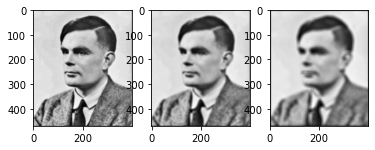

In [7]:
from scipy.signal import convolve2d

#apply box filter on images (using convolve2d)
img_box_5 = convolve2d(img, box_filter(5), mode='same')
img_box_9 = convolve2d(img, box_filter(9), mode='same')
img_box_15 = convolve2d(img, box_filter(15), mode='same')

#display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_box_5, cmap="gray");
ax[1].imshow(img_box_9, cmap="gray");
ax[2].imshow(img_box_15, cmap="gray");

Die Bilder unterscheiden sich in ihrer Schärfe bzw. Unschärfe. Je grösser die Zahl n gewählt wird, desto grösser wird der Kernel (da nxn), und desto kleiner die Werte im Kernel (da 1/n für jeden Wert). Je grösser ein Kernel ist (und je kleiner somit dessen Werte), desto weniger Unterscheiden sich letztendlich die benachbarten Pixel, was zum sog. Blur-Effekt führt. Folgende selbstgemachte Skizze veranschaulicht dies nochmals: 
</br><img src="aufgabe8_skizze.png" width=400 height=400 />

### Aufgabe 10 (5 Punkte)

Nun implementieren wir eine Filter-Operation von Hand. Programmiere eine Funktion, welche ein Graustufenbild sowie einen 3x3 Kernel entgegen nimmt, dann den Kernel auf das Bild anwendet und schliesslich das resultierende Bild zurück gibt. Benutze dazu <b>keine</b> vorgefertigte Funktion wie convolve2d welche die Convolution für dich implementiert. Einfache Array-Operationen von Numpy darfst du verwenden.

Benutze nun diese Funktion, um den folgenden Kernel auf das Bild von Alan Turing anzuwenden:

$$
kernel = 
\begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{bmatrix}
$$

<!-- <img src="edge_filter_hor.png" style="width:120px" /> -->

Plotte das Resultierende Bild. Der Kernel ist ein Kantendetektionsfilter. Warum erscheinen einige Kanten dunkel aber andere Hell?

In [ ]:
def convolution(img, kernel):
    # YOUR CODE HERE
    raise NotImplementedError()

    return result

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 11 (6 Punkte)
Nun führen wir eine Kanten-Detektion mit dem sogenanten Sobel-Operator durch. Dabei werden die horizontalen und die Vertikalen Kanten einzeln detektiert und danach in einem Bild zusammengebracht.

Dazu verwendet man die folgenden beiden Kernel:

$$
G_x = 
\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{bmatrix}
$$

$$
G_y = 
\begin{bmatrix}
-1 & -2 & -1 \\
0  & 0  & 0 \\
1  & 2  & 1 \\
\end{bmatrix}
$$
<!-- 
<img src="sobel_kernel.gif" style="width:300px" /> -->

$Gx$ detektiert die vertikalen Kanten und $Gy$ die horizontalen. Nehmen wir an, das Resultat der Faltung mit $Gy$ heisst 'ResY' und das Resultat der Faltung mit $Gx$ 'ResX'. Dann wird das final resultierende Bild der Sobel-Kantendetektion mit folgender pixelweisen Operation berechnet:

$result = \sqrt{ResX^2 + ResY^2}$

Auch zur Sobel-Kantendetektion gibt es ein [Computerphile video](https://www.youtube.com/watch?v=uihBwtPIBxM&t=70s)

Schreibe eine Funktion, welche ein Bild als Numpy-Array entgegennimmt, die Sobel-Kantendetektion durchführt und das Resultat wiederum als Numpy-Array zurück gibt. Benutze für die Filterdetektion deine Funktion aus Aufgabe 10. Führe dann eine Sobel-Kantendetektion auf dem Bild von Alan Turing aus und plotte das Resultat.

Der Kernel aus Aufgebe 10 enthielt nur die Zahlen -1, 0 und 1. $Gx$ enthält aber auch noch jeweils eine -2 und eine 2. Wie verändert dieser Unterschied die Faltungsoperation?

Warum wurde das Schlussresultat der Sobel-Kantendetektion mit der obigen Formel und nicht einfach durch $result = ResX + ResY$ berechnet? Wozu dienen das Quadrieren und das Ziehen der Wurzel?

In [ ]:
def sobel(img):
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return result

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE